In [2]:
import numpy as np
from sklearn import datasets

from pulearn import (
    SoftmaxRegression,
    WeightedUnlabelledSoftmaxRegression,
    HardBootstrappingSoftmaxRegression,
    UnlabelledExponentialLossSoftmaxRegression)
from pulearn.utils import (
    synthesize_pu_labels,
    fit_and_plot
)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Experiment (Synthetic 2D Gaussians)

## Normal setup

In [4]:
n_classes = 3
X, y = datasets.make_blobs(n_samples=100, n_features=2,
                           centers=[[-3,0], [3,0], [0, 3]])
Y = np.eye(n_classes)[y]

Loss: 0.0472926042948


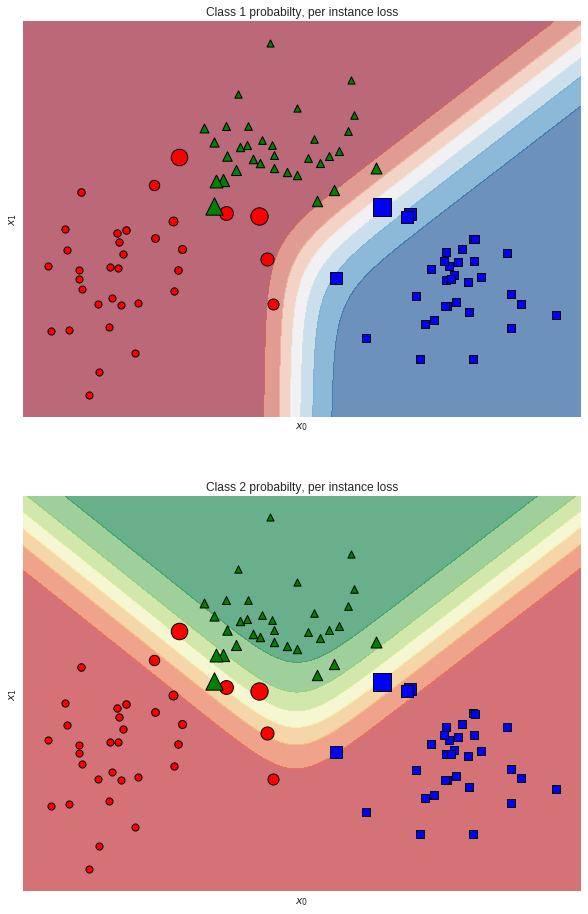

In [5]:
softreg = SoftmaxRegression(n_classes=n_classes,
                            batch_size=100,
                            learning_rate=1e-3,
                            alpha=0.,
                            epochs=200,
                            class_weight=None,
                            random_state=None)
fit_and_plot(X, Y, classifier=softreg, marker_size=["loss"])
print('Loss:', softreg.cost_[-1])

## PU setup

In [6]:
Y_pu = synthesize_pu_labels(Y, random_state=42, verbose=True)

Positive (pct_missing=0.0): 99  vs. 99
Positive (pct_missing=0.1): 99  vs. 90
Positive (pct_missing=0.2): 99  vs. 80
Positive (pct_missing=0.30000000000000004): 99  vs. 73
Positive (pct_missing=0.4): 99  vs. 59
Positive (pct_missing=0.5): 99  vs. 54
Positive (pct_missing=0.6000000000000001): 99  vs. 26
Positive (pct_missing=0.7000000000000001): 99  vs. 34
Positive (pct_missing=0.8): 99  vs. 15
Positive (pct_missing=0.9): 99  vs. 5
Positive (pct_missing=1.0): 99  vs. 0


Loss: 0.259739392604


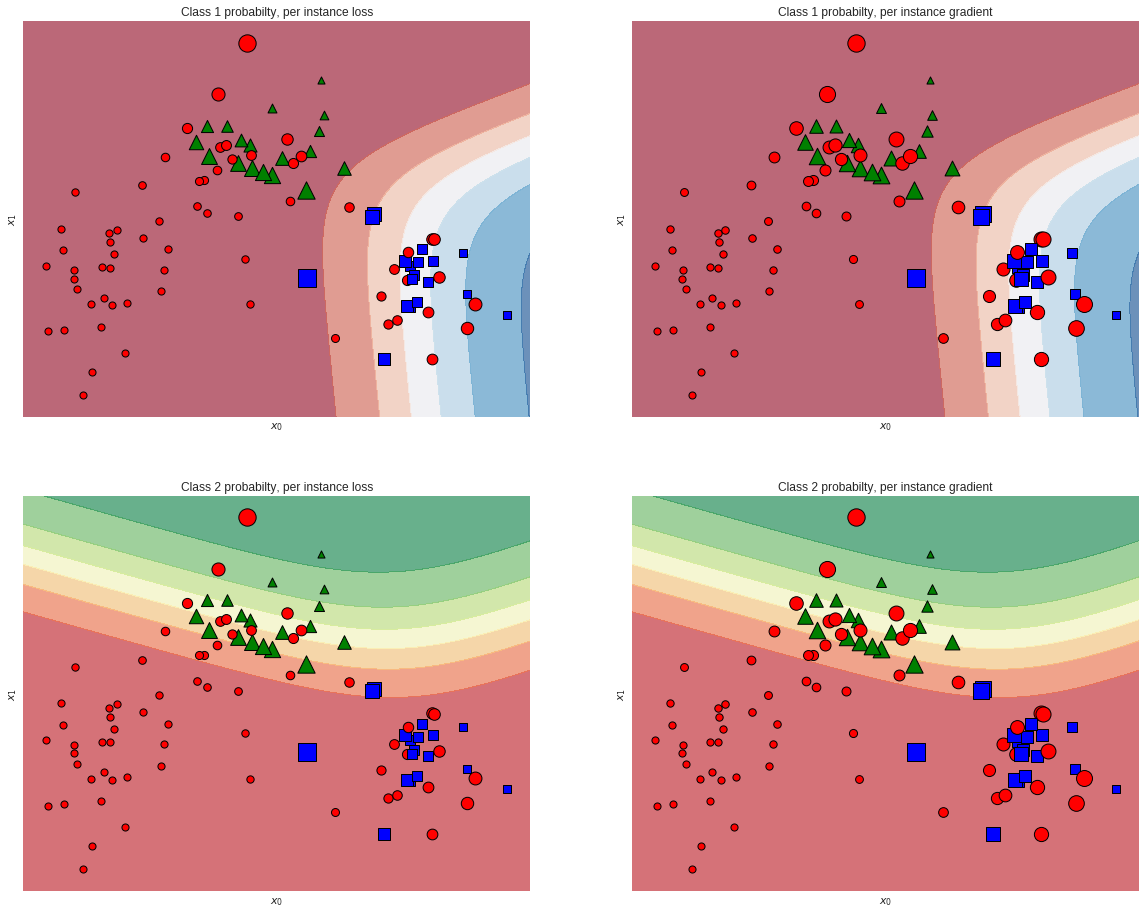

In [28]:
softreg = SoftmaxRegression(n_classes=n_classes,
                            batch_size=100,
                            learning_rate=1e-2,
                            alpha=0.,
                            epochs=200,
                            class_weight=None,
                            random_state=None)
fit_and_plot(X, Y_pu[0.5], classifier=softreg, marker_size=["loss", "gradient"])
print('Loss:', softreg.cost_[-1])

Loss: 0.132414814175


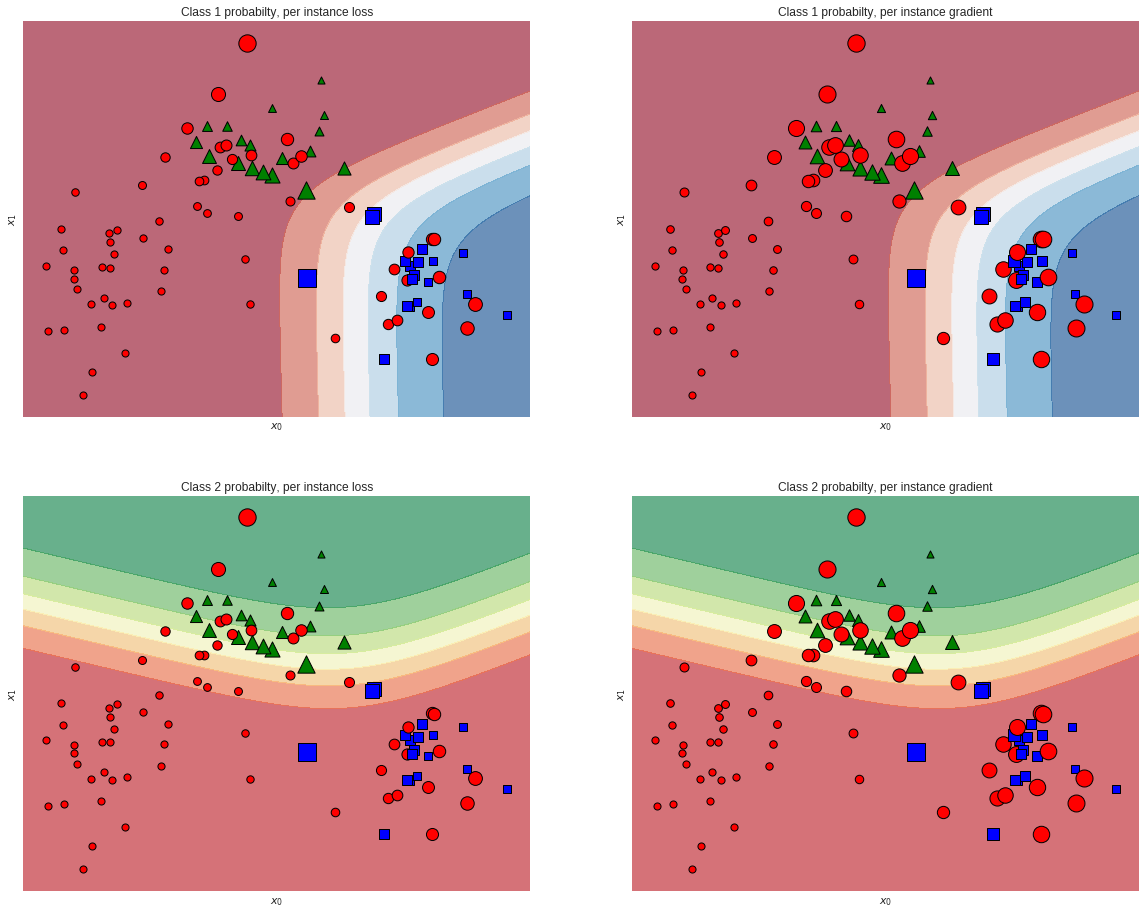

In [25]:
softreg = SoftmaxRegression(n_classes=n_classes,
                            batch_size=100,
                            learning_rate=1e-2,
                            alpha=0.,
                            epochs=200,
                            class_weight="balanced",
                            random_state=None)
fit_and_plot(X, Y_pu[0.5], classifier=softreg, marker_size=["loss", "gradient"])
print('Loss:', softreg.cost_[-1])

Loss: 0.0866872782989


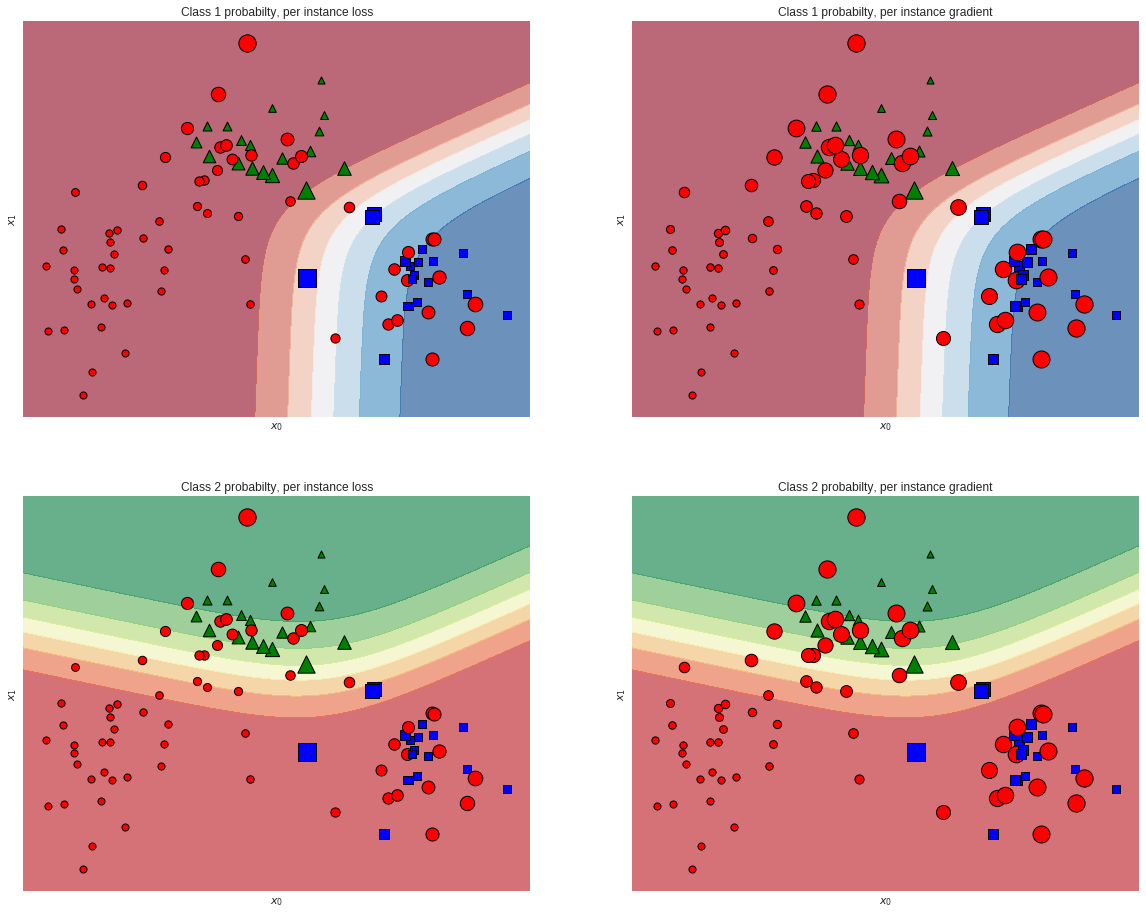

In [21]:
wusr = WeightedUnlabelledSoftmaxRegression(n_classes=n_classes,
                            batch_size=100,
                            learning_rate=1e-2,
                            alpha=0.,
                            epochs=200,
                            class_weight="balanced",
                            unlabelled_weight={0:0.5, 1:1, 2:1},
                            random_state=None)
fit_and_plot(X, Y_pu[0.5], classifier=wusr, marker_size=["loss", "gradient"])
print('Loss:', wusr.cost_[-1])

Loss 0.0928660633922


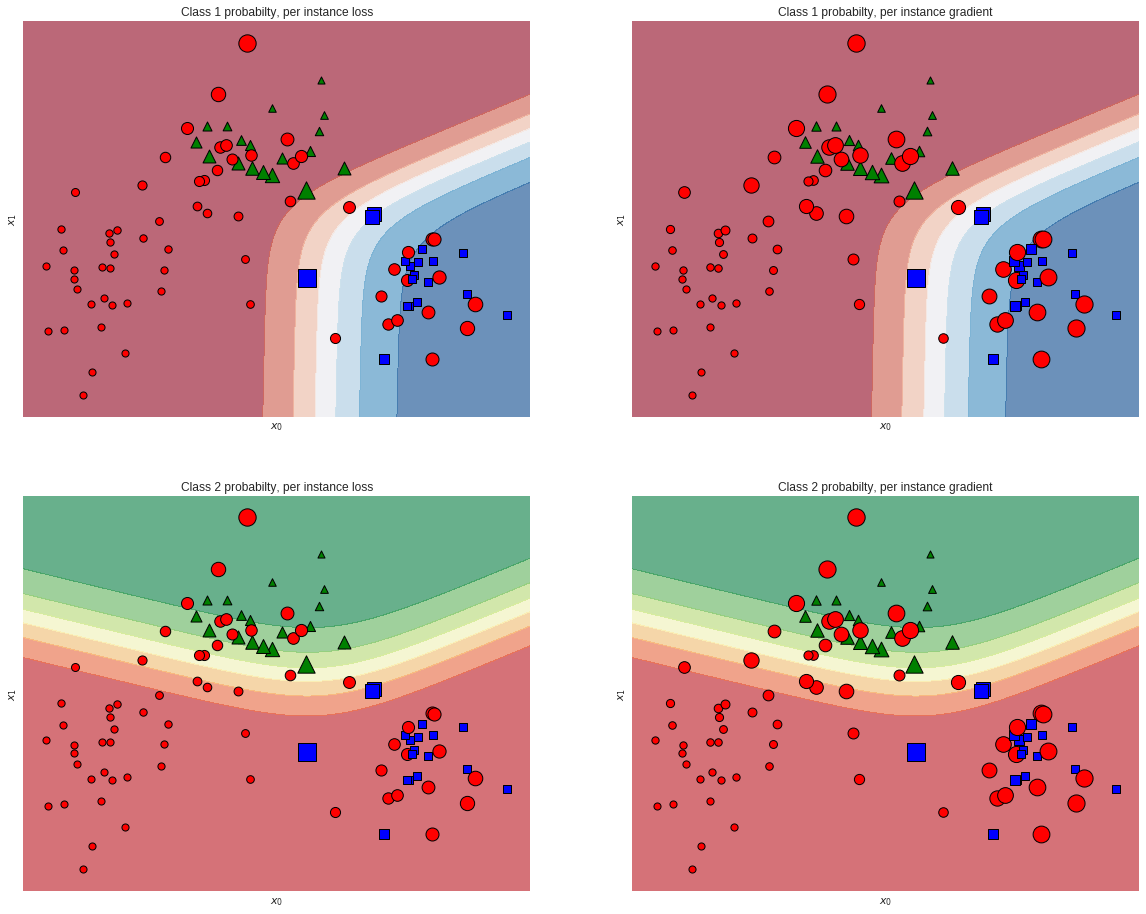

In [20]:
hbsr = HardBootstrappingSoftmaxRegression(n_classes=n_classes,
                            batch_size=100,
                            learning_rate=1e-2,
                            alpha=0.,
                            epochs=200,
                            class_weight="balanced",
                            unlabelled_weight={0:0.5, 1:1, 2:1},
                            random_state=None)
fit_and_plot(X, Y_pu.get(0.5), classifier=hbsr, marker_size=["loss", "gradient"])
print("Loss", hbsr.cost_[-1])

Loss 0.136027628366


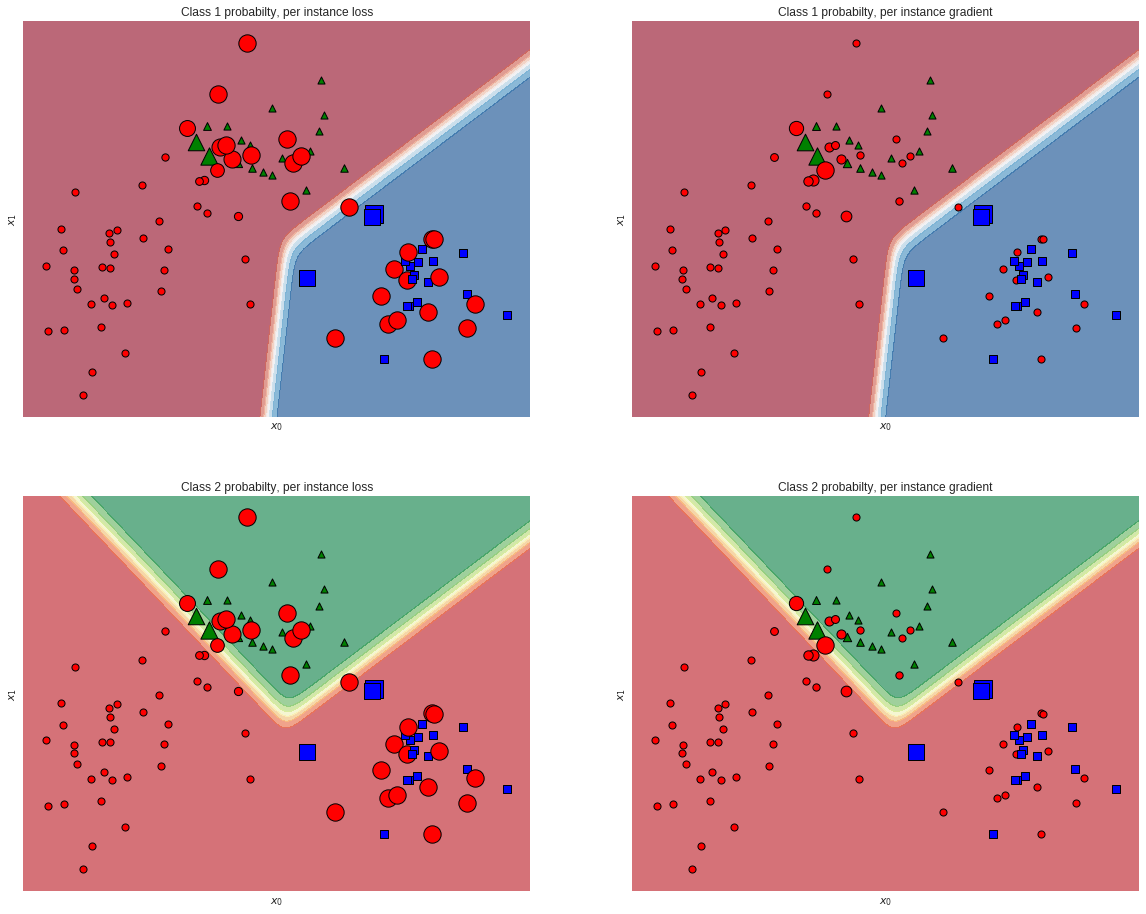

In [18]:
uelsr = UnlabelledExponentialLossSoftmaxRegression(n_classes=n_classes,
                            batch_size=100,
                            learning_rate=1e-1,
                            alpha=0.,
                            epochs=200,
                            class_weight=None,
                            random_state=None)
fit_and_plot(X, Y_pu.get(0.5), classifier=uelsr, marker_size=["loss", "gradient"])
print("Loss", uelsr.cost_[-1])